### Importações

In [1]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# dados20 = pd.read_csv('/content/drive/MyDrive/blockchain_network/dataset/data2020.csv')
# dados21 = pd.read_csv('/content/drive/MyDrive/blockchain_network/dataset/data2021.csv')
# graph20 = pd.read_csv('/content/drive/MyDrive/blockchain_network/dataset/graph_2020')
dados20 = pd.read_csv('data2020.csv')
dados21 = pd.read_csv('data2021.csv')
graph20 = pd.read_csv('graph_2020')

/tmp/ipykernel_132869/3480308974.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  dados20 = pd.read_csv('data2020.csv')
/tmp/ipykernel_132869/3480308974.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  dados21 = pd.read_csv('data2021.csv')


In [3]:
dados21.head()

,ID_token,Seller_address,Buyer_address,Price_USD,Datetime_updated,Datetime_updated_seconds,Collection_cleaned,Category
0,228501420.0,0x6958f5e95332d93d21af0d7b9ca85b8212fee0a5,0x34ce8e4b34f2ac3ae80f11864f8a43d008ff67b9,11.993850,2021-01-31,2021-01-31 14:55:49,Godsunchained,Games
1,12533788.0,0x6958f5e95332d93d21af0d7b9ca85b8212fee0a5,0xf2bd723e3a119b6c72ed573f86d7794c5243f9f0,6.529985,2021-01-31,2021-01-31 06:47:12,Godsunchained,Games
2,1712673.0,0xb04239b53806ab31141e6cd47c63fb3480cac908,0x753d99cd681dd38f1e16f6ff5695d49c943e8763,94.985997,2021-01-30,2021-01-30 11:10:41,Godsunchained,Games
3,56925553.0,0xb04239b53806ab31141e6cd47c63fb3480cac908,0x753d99cd681dd38f1e16f6ff5695d49c943e8763,27.334100,2021-01-30,2021-01-30 10:37:22,Godsunchained,Games
4,58376688.0,0x6958f5e95332d93d21af0d7b9ca85b8212fee0a5,0x34ce8e4b34f2ac3ae80f11864f8a43d008ff67b9,34.167625,2021-01-30,2021-01-30 05:28:40,Godsunchained,Games


## Filtrando NFTs comercalizados tanto em 2020 quanto em 2021

In [4]:
# id_tokens = set(dados21['ID_token']) # pega todos os nfts unicos que foram comercializados em 21
# filter = dados20[dados20['ID_token'].isin(id_tokens)]

unique_id_price_pairs = dados21[['ID_token', 'Price_USD']].drop_duplicates()
id_tokens_to_filter = set(unique_id_price_pairs['ID_token'])
filter = dados20[dados20['ID_token'].isin(id_tokens_to_filter)]

In [5]:
filter

,ID_token,Seller_address,Buyer_address,Price_USD,Datetime_updated,Datetime_updated_seconds,Collection_cleaned,Category
713,7418509.0,0x4ef40d1bf0983899892946830abf99eca2dbc5ce,0x0008d343091ef8bd3efa730f6aae5a26a285c7a2,71.825850,2020-01-29,2020-01-29 15:41:36,Godsunchained,Games
990,40581338.0,0x4ef40d1bf0983899892946830abf99eca2dbc5ce,0x2e044e95be6207474b381fb3721b782809cf6af8,10.493581,2020-01-29,2020-01-29 01:39:10,Godsunchained,Games
1010,124329580.0,0x4ef40d1bf0983899892946830abf99eca2dbc5ce,0x901c38bad8fdcfd42c10230d2fb151d4afa5017b,15.655179,2020-01-28,2020-01-28 23:44:38,Godsunchained,Games
3486,104652409.0,0x4ef40d1bf0983899892946830abf99eca2dbc5ce,0x16cac4f493db73c12ff9febbf794be4a31dc865d,479.970000,2020-01-25,2020-01-25 02:33:12,Godsunchained,Games
3702,111789380.0,0x4ef40d1bf0983899892946830abf99eca2dbc5ce,0x16cac4f493db73c12ff9febbf794be4a31dc865d,77.404800,2020-01-24,2020-01-24 21:56:40,Godsunchained,Games
...,...,...,...,...,...,...,...,...
1245941,8701,0x171ab540b9cb730626db91f648e2b09eb5363484,0x916d82e095ff6ba820d1daef029420c4007b0c08,456.961400,2020-12-01,2020-12-01 00:29:00,Pgfk,Utility
1245942,85605,0x83b62309d64ed613fa8f6395cd7ed84c23b79149,0xc29969b398ff2a42e0280e783b83be3557c38b1e,15.031625,2020-12-01,2020-12-01 00:26:17,Rari,Art
1245943,40,0xb0b0a3e99a89ddb6c03e2254d337062d7bcef9cf,0x17465f2a70b6c6b39e333615c27cecba3f937a8b,91.807548,2020-12-01,2020-12-01 00:24:52,Duckdaohunter,Collectible
1245951,9004,0xfd68082c61f208183cf55b309de214206b8f0082,0x01e4625e44820daf8526730b79f0ed4c023c37a0,73.895468,2020-12-01,2020-12-01 00:13:50,Superrare,Art


## Filtrar o utlimo dono de cada NFT

In [ ]:
idx_last_transaction = filter.groupby('ID_token')['Datetime_updated_seconds'].idxmax()

last_transactions = filter.loc[idx_last_transaction]


last_owners_df = last_transactions[[
    'ID_token',
    'Buyer_address',
    'Seller_address',
    'Price_USD'
]].rename(columns={
    'ID_token': 'NFT',
    'Buyer_address': 'last_owner',
    'Seller_address': 'origin_seller',
    'Price_USD': 'Price_USD'
})


In [14]:
last_owners_df

,NFT,last_owner,origin_seller,Price_USD
159231,42,0x63a9dbce75413036b2b778e670aabd4493aaf9f3,0x5ae8367ce61d6cefc8df4cd52a401a7faa60ecbe,10269.236238
16613,20016.0,0xbe3c200d4baadb074a3db06c85398829ed379172,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,1424.668500
136999,242910,0xc35a5fec6be6957899e15559be252db882220b37,0x4fabda075e15e9245ed7cfb5db398b4683bfcf54,336.293530
136998,264534,0xc35a5fec6be6957899e15559be252db882220b37,0x4fabda075e15e9245ed7cfb5db398b4683bfcf54,336.293530
137327,302937,0x15d8a191caabda7eee2ccdb513f557575158c14e,0x4fabda075e15e9245ed7cfb5db398b4683bfcf54,221.367562
...,...,...,...,...
933290,9998825238229210287078128415892911766717578886...,0x01804886807bb66bf1208657f4ce895ad0ff1dfc,0x399f298fb0f0ac25398f30c83b4cfdfe904bf289,12.471680
1227861,9999,0x43a7484431cc7cbc9220dec7cd85420492dbe572,0x9b0726e95e72eb6f305b472828b88d2d2bdd41c7,12.015045
1050681,99992,0x7a38760c295f1ea086005214a279fb1280010483,0xc88fe9bfce6294c0faa5eb3fbed02cdd6b59cd95,188.059880
1114054,9999800110335981664101193032831097660115582765...,0x3603cb5217bff0b3a88fe1537f9ba81848cebbac,0x19804927f74c3c0899afd49d56bff6ddae6cf518,43.539750


In [15]:
last_owners_df['NFT'].value_counts()

NFT
99998323704849204531555555089620989712894400057666221660401266326009690284455    1
42                                                                               1
20016.0                                                                          1
242910                                                                           1
264534                                                                           1
                                                                                ..
560077                                                                           1
540966.0                                                                         1
523211                                                                           1
504953                                                                           1
492736                                                                           1
Name: count, Length: 69435, dtype: int64

### Calcular as métricas

- As métricas para todos os nós já estão calculadas no node_data, então preciso apenas filtrar as métricas dos ultimos donos.

In [8]:
node_data = pd.read_csv('node_data.csv')
node_data.head(2)

,node,NFT_mean_origin,NFT_mean_destiny,in_degree,out_degree,mean_seller_neighbors,mean_buyer_neighbors,clustering_coeficient,in_weighted_degree,out_weighted_degree,betweenness_centrality,pagerank
0,0x4ef40d1bf0983899892946830abf99eca2dbc5ce,32.067865,0.00000,0,46,40.174862,55.122011,0.017874,0.000000,2405.089855,0.000000,0.000013
1,0x0008d343091ef8bd3efa730f6aae5a26a285c7a2,17.206069,42.68173,141,5,102.036117,32.277500,0.005857,8450.982481,86.030344,0.001013,0.000852


In [6]:
node_data.to_csv('node_data_v.csv', index=False)

In [ ]:
metric_cols = [col for col in node_data.columns if col != 'node']


rename_map_src = {col: f'{col}_src' for col in metric_cols}
node_data_src = node_data.rename(columns=rename_map_src)


last_owners_df_enriched = last_owners_df.merge(
    node_data_src,
    left_on='last_owner',
    right_on='node',
    how='left'
)

last_owners_df_enriched = last_owners_df_enriched.drop(columns=['node'])



In [19]:
last_owners_df_enriched

,NFT,last_owner,origin_seller,Price_USD,NFT_mean_origin_src,NFT_mean_destiny_src,in_degree_src,out_degree_src,mean_seller_neighbors_src,mean_buyer_neighbors_src,clustering_coeficient_src,in_weighted_degree_src,out_weighted_degree_src,betweenness_centrality_src,pagerank_src
0,42,0x63a9dbce75413036b2b778e670aabd4493aaf9f3,0x5ae8367ce61d6cefc8df4cd52a401a7faa60ecbe,10269.236238,898.617805,363.422081,57.0,68.0,801.646795,631.851829,0.053281,51605.935466,102442.429811,4.631289e-04,0.000135
1,20016.0,0xbe3c200d4baadb074a3db06c85398829ed379172,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,1424.668500,0.000000,302.071687,9.0,0.0,0.000000,0.000000,0.027778,3020.716873,0.000000,0.000000e+00,0.000152
2,242910,0xc35a5fec6be6957899e15559be252db882220b37,0x4fabda075e15e9245ed7cfb5db398b4683bfcf54,336.293530,225.093224,392.492233,30.0,105.0,479.980280,272.649511,0.036177,32969.347563,48620.136304,5.369610e-04,0.000102
3,264534,0xc35a5fec6be6957899e15559be252db882220b37,0x4fabda075e15e9245ed7cfb5db398b4683bfcf54,336.293530,225.093224,392.492233,30.0,105.0,479.980280,272.649511,0.036177,32969.347563,48620.136304,5.369610e-04,0.000102
4,302937,0x15d8a191caabda7eee2ccdb513f557575158c14e,0x4fabda075e15e9245ed7cfb5db398b4683bfcf54,221.367562,107.520183,129.695118,5.0,4.0,136.882799,288.527517,0.027778,907.865829,645.121100,2.031625e-05,0.000040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69430,9998825238229210287078128415892911766717578886...,0x01804886807bb66bf1208657f4ce895ad0ff1dfc,0x399f298fb0f0ac25398f30c83b4cfdfe904bf289,12.471680,9.034324,9.243746,34.0,8.0,27.080341,34.677158,0.072177,425.212305,72.274595,1.613695e-04,0.000085
69431,9999,0x43a7484431cc7cbc9220dec7cd85420492dbe572,0x9b0726e95e72eb6f305b472828b88d2d2bdd41c7,12.015045,29.666000,17.170613,4.0,1.0,0.000000,14.958594,0.050000,85.853065,29.666000,1.172858e-09,0.000018
69432,99992,0x7a38760c295f1ea086005214a279fb1280010483,0xc88fe9bfce6294c0faa5eb3fbed02cdd6b59cd95,188.059880,173.415733,167.949831,9.0,2.0,4238.472294,776.788374,0.000000,2015.397976,520.247200,5.826702e-05,0.000056
69433,9999800110335981664101193032831097660115582765...,0x3603cb5217bff0b3a88fe1537f9ba81848cebbac,0x19804927f74c3c0899afd49d56bff6ddae6cf518,43.539750,33.353628,26.325387,34.0,27.0,27.501616,33.500050,0.080230,1368.920130,967.255215,2.343676e-04,0.000115


### Calcular o valor de y
  calcular o valor médio dos NFTS em 2020/2021 e colocar como atributo

In [28]:
mean_price_20 = dados20.groupby('ID_token')['Price_USD'].mean().reset_index()
mean_price_20.rename(columns={'ID_token': 'NFT', 'Price_USD': 'mean_price_2020'}, inplace=True)
mean_price_20.head()


,NFT,mean_price_2020
0,8,17997.360000
1,28,71272.387500
2,29,5788.282500
3,42,10269.236238
4,67,8843.861440


In [29]:
last_owners_df_enriched = pd.merge(mean_price_20, last_owners_df_enriched, on='NFT', how='inner')
last_owners_df_enriched.head()

,NFT,mean_price_2020,mean_price_2021,last_owner,origin_seller,Price_USD,NFT_mean_origin_src,NFT_mean_destiny_src,in_degree_src,out_degree_src,...,NFT_mean_destiny_dest,in_degree_dest,out_degree_dest,mean_seller_neighbors_dest,mean_buyer_neighbors_dest,clustering_coeficient_dest,in_weighted_degree_dest,out_weighted_degree_dest,betweenness_centrality_dest,pagerank_dest
0,42,10269.236238,70050.01085,0x63a9dbce75413036b2b778e670aabd4493aaf9f3,0x5ae8367ce61d6cefc8df4cd52a401a7faa60ecbe,10269.236238,898.617805,363.422081,57.0,68.0,...,0.0,0.0,1.0,898.617805,363.422081,0.00000,0.0,20538.472476,0.0,0.000013
1,20016.0,1424.668500,4277.31000,0xbe3c200d4baadb074a3db06c85398829ed379172,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,1424.668500,0.000000,302.071687,9.0,0.0,...,0.0,0.0,28.0,83.947806,131.149523,0.02381,0.0,7138.896415,0.0,0.000013
2,242910,336.293530,535.64700,0xc35a5fec6be6957899e15559be252db882220b37,0x4fabda075e15e9245ed7cfb5db398b4683bfcf54,336.293530,225.093224,392.492233,30.0,105.0,...,0.0,0.0,51.0,160.302558,165.965871,0.00902,0.0,10323.756229,0.0,0.000013
3,264534,336.293530,610.58390,0xc35a5fec6be6957899e15559be252db882220b37,0x4fabda075e15e9245ed7cfb5db398b4683bfcf54,336.293530,225.093224,392.492233,30.0,105.0,...,0.0,0.0,51.0,160.302558,165.965871,0.00902,0.0,10323.756229,0.0,0.000013
4,302937,221.367562,1519.36120,0x15d8a191caabda7eee2ccdb513f557575158c14e,0x4fabda075e15e9245ed7cfb5db398b4683bfcf54,221.367562,107.520183,129.695118,5.0,4.0,...,0.0,0.0,51.0,160.302558,165.965871,0.00902,0.0,10323.756229,0.0,0.000013


In [30]:
# inter_df.drop('node', axis=1, inplace=True)
last_owners_df_enriched.head(1)

,NFT,mean_price_2020,mean_price_2021,last_owner,origin_seller,Price_USD,NFT_mean_origin_src,NFT_mean_destiny_src,in_degree_src,out_degree_src,...,NFT_mean_destiny_dest,in_degree_dest,out_degree_dest,mean_seller_neighbors_dest,mean_buyer_neighbors_dest,clustering_coeficient_dest,in_weighted_degree_dest,out_weighted_degree_dest,betweenness_centrality_dest,pagerank_dest
0,42,10269.236238,70050.01085,0x63a9dbce75413036b2b778e670aabd4493aaf9f3,0x5ae8367ce61d6cefc8df4cd52a401a7faa60ecbe,10269.236238,898.617805,363.422081,57.0,68.0,...,0.0,0.0,1.0,898.617805,363.422081,0.0,0.0,20538.472476,0.0,0.000013


In [39]:
pd.read_csv('dataset_final.csv').head()

/tmp/ipykernel_2039889/3841552194.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('dataset_final.csv').head()


,NFT,mean_price_2020,mean_price_2021,last_owner,origin_seller,Price_USD,NFT_mean_origin_src,NFT_mean_destiny_src,in_degree_src,out_degree_src,...,in_degree_dest,out_degree_dest,mean_seller_neighbors_dest,mean_buyer_neighbors_dest,clustering_coeficient_dest,in_weighted_degree_dest,out_weighted_degree_dest,betweenness_centrality_dest,pagerank_dest,Quartil
0,42.0,10269.236238,70050.01085,0x63a9dbce75413036b2b778e670aabd4493aaf9f3,0x5ae8367ce61d6cefc8df4cd52a401a7faa60ecbe,10269.236238,898.617805,363.422081,57.0,68.0,...,0.0,1.0,898.617805,363.422081,0.00000,0.0,20538.472476,0.0,0.000013,3
1,20016.0,1424.668500,4277.31000,0xbe3c200d4baadb074a3db06c85398829ed379172,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,1424.668500,0.000000,302.071687,9.0,0.0,...,0.0,28.0,83.947806,131.149523,0.02381,0.0,7138.896415,0.0,0.000013,3
2,242910.0,336.293530,535.64700,0xc35a5fec6be6957899e15559be252db882220b37,0x4fabda075e15e9245ed7cfb5db398b4683bfcf54,336.293530,225.093224,392.492233,30.0,105.0,...,0.0,51.0,160.302558,165.965871,0.00902,0.0,10323.756229,0.0,0.000013,3
3,264534.0,336.293530,610.58390,0xc35a5fec6be6957899e15559be252db882220b37,0x4fabda075e15e9245ed7cfb5db398b4683bfcf54,336.293530,225.093224,392.492233,30.0,105.0,...,0.0,51.0,160.302558,165.965871,0.00902,0.0,10323.756229,0.0,0.000013,3
4,302937.0,221.367562,1519.36120,0x15d8a191caabda7eee2ccdb513f557575158c14e,0x4fabda075e15e9245ed7cfb5db398b4683bfcf54,221.367562,107.520183,129.695118,5.0,4.0,...,0.0,51.0,160.302558,165.965871,0.00902,0.0,10323.756229,0.0,0.000013,3


## Calcular o percentil

In [35]:
a = pd.read_csv('dataset_final.csv')

/tmp/ipykernel_2039889/2303810537.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  a = pd.read_csv('dataset_final.csv')


In [36]:
# --> divisão em percentis

def calcula_quartis_limites(data_series):
  """
  Calcula os limites dos quartis (Q1 e Q3) de uma Series.

  Args:
    data_series (pd.Series): A Series de dados para calcular os quartis.

  Returns:
    dict: Um dicionário contendo os limites do 25º e 75º percentil.
  """
  # Usamos o .quantile() do pandas que é apropriado aqui
  q1 = data_series.quantile(0.25)
  q3 = data_series.quantile(0.75)
  return {'q1': q1, 'q3': q3}



def classifica_quartil(df):
  """
  Classifica os preços em quartis (low, mid, high) e adiciona a coluna 'Quartil' ao DataFrame.

  Args:
    df (pd.DataFrame): O DataFrame que contém a coluna 'Price_USD' e onde a
                       coluna 'Quartil' será adicionada.

  Returns:
    pd.DataFrame: O DataFrame com a nova coluna 'Quartil'.
  """
  print('Iniciando classificação de quartil...')

  # Chama a função para obter os limites dos quartis da coluna 'Price_USD'
  limites_quartis = calcula_quartis_limites(df['Price_USD'])
  q1_limite = limites_quartis['q1']
  q3_limite = limites_quartis['q3']

  print(f"Limite Q1 (25º percentil): {q1_limite}")
  print(f"Limite Q3 (75º percentil): {q3_limite}")

  # Aplica a lógica de classificação diretamente na coluna 'Price_USD'
  # low: 1 (<= Q1)
  # mid: 2 (> Q1 e <= Q3)
  # high: 3 (> Q3)
  df['Quartil'] = df['Price_USD'].apply(lambda x:
                                       1 if x <= q1_limite else
                                       (2 if x > q1_limite and x <= q3_limite else 3)
                                      )
  print('Classificação de quartil concluída.')
  return df


dados_class= classifica_quartil(a)

Iniciando classificação de quartil...
Limite Q1 (25º percentil): 5.80425
Limite Q3 (75º percentil): 61.87344848400298
Classificação de quartil concluída.


In [37]:
dados_class

,NFT,mean_price_2020,mean_price_2021,last_owner,origin_seller,Price_USD,NFT_mean_origin_src,NFT_mean_destiny_src,in_degree_src,out_degree_src,...,in_degree_dest,out_degree_dest,mean_seller_neighbors_dest,mean_buyer_neighbors_dest,clustering_coeficient_dest,in_weighted_degree_dest,out_weighted_degree_dest,betweenness_centrality_dest,pagerank_dest,Quartil
0,42.0,10269.236238,70050.010850,0x63a9dbce75413036b2b778e670aabd4493aaf9f3,0x5ae8367ce61d6cefc8df4cd52a401a7faa60ecbe,10269.236238,898.617805,363.422081,57.0,68.0,...,0.0,1.0,898.617805,363.422081,0.000000,0.000000,20538.472476,0.000000e+00,0.000013,3
1,20016.0,1424.668500,4277.310000,0xbe3c200d4baadb074a3db06c85398829ed379172,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,1424.668500,0.000000,302.071687,9.0,0.0,...,0.0,28.0,83.947806,131.149523,0.023810,0.000000,7138.896415,0.000000e+00,0.000013,3
2,242910.0,336.293530,535.647000,0xc35a5fec6be6957899e15559be252db882220b37,0x4fabda075e15e9245ed7cfb5db398b4683bfcf54,336.293530,225.093224,392.492233,30.0,105.0,...,0.0,51.0,160.302558,165.965871,0.009020,0.000000,10323.756229,0.000000e+00,0.000013,3
3,264534.0,336.293530,610.583900,0xc35a5fec6be6957899e15559be252db882220b37,0x4fabda075e15e9245ed7cfb5db398b4683bfcf54,336.293530,225.093224,392.492233,30.0,105.0,...,0.0,51.0,160.302558,165.965871,0.009020,0.000000,10323.756229,0.000000e+00,0.000013,3
4,302937.0,221.367562,1519.361200,0x15d8a191caabda7eee2ccdb513f557575158c14e,0x4fabda075e15e9245ed7cfb5db398b4683bfcf54,221.367562,107.520183,129.695118,5.0,4.0,...,0.0,51.0,160.302558,165.965871,0.009020,0.000000,10323.756229,0.000000e+00,0.000013,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69430,9998825238229210287078128415892911766717578886...,12.321692,28.326590,0x01804886807bb66bf1208657f4ce895ad0ff1dfc,0x399f298fb0f0ac25398f30c83b4cfdfe904bf289,12.471680,9.034324,9.243746,34.0,8.0,...,7.0,13.0,41.356499,36.686507,0.239474,563.719940,494.648815,1.647866e-07,0.000036,2
69431,9999,45.894007,118.513317,0x43a7484431cc7cbc9220dec7cd85420492dbe572,0x9b0726e95e72eb6f305b472828b88d2d2bdd41c7,12.015045,29.666000,17.170613,4.0,1.0,...,2.0,21.0,49.562336,67.475928,0.005929,35.602795,732.046795,2.183223e-04,0.000014,2
69432,99992,104.078731,313.177000,0x7a38760c295f1ea086005214a279fb1280010483,0xc88fe9bfce6294c0faa5eb3fbed02cdd6b59cd95,188.059880,173.415733,167.949831,9.0,2.0,...,16.0,26.0,54.031473,66.498266,0.013357,1647.317325,1577.382254,1.935703e-04,0.000059,3
69433,9999800110335981664101193032831097660115582765...,42.088425,24.933225,0x3603cb5217bff0b3a88fe1537f9ba81848cebbac,0x19804927f74c3c0899afd49d56bff6ddae6cf518,43.539750,33.353628,26.325387,34.0,27.0,...,163.0,299.0,30.734527,34.146525,0.028571,10502.646085,13682.137625,6.713095e-04,0.000801,2


In [ ]:
dados_class['Quartil'].value_counts()

,count
Quartil,
2,34715
1,17361
3,17359


In [ ]:
dados_class[dados_class['Quartil'] == 3]

,NFT,mean_price_2021,mean_price_2020,last_owner,origin_seller,Price_USD,NFT_mean_origin_src,NFT_mean_destiny_src,in_degree_src,out_degree_src,...,mean_buyer_neighbors_src,clustering_coeficient_src,NFT_mean_origin_dest,NFT_mean_destiny_dest,in_degree_dest,out_degree_dest,mean_seller_neighbors_dest,mean_buyer_neighbors_dest,clustering_coeficient_dest,Quartil
0,42.0,70050.010850,10269.236238,0x63a9dbce75413036b2b778e670aabd4493aaf9f3,0x5ae8367ce61d6cefc8df4cd52a401a7faa60ecbe,10269.236238,1034.580857,253.527651,86,81,...,240.936430,0.045235,10269.236238,0.000000,0,1,1034.580857,0.000000,0.000000,3
1,20016.0,4277.310000,1424.668500,0xbe3c200d4baadb074a3db06c85398829ed379172,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,1424.668500,8.766928,53.077299,47,34,...,9.399471,0.027323,4.785054,0.000000,0,732,97.087661,0.000000,0.025829,3
2,242910.0,535.647000,336.293530,0xc35a5fec6be6957899e15559be252db882220b37,0x4fabda075e15e9245ed7cfb5db398b4683bfcf54,336.293530,148.031668,75.508656,169,225,...,63.632370,0.033500,30.078725,0.000000,0,1615,37.155423,0.000000,0.001394,3
3,264534.0,610.583900,336.293530,0xc35a5fec6be6957899e15559be252db882220b37,0x4fabda075e15e9245ed7cfb5db398b4683bfcf54,336.293530,148.031668,75.508656,169,225,...,63.632370,0.033500,30.078725,0.000000,0,1615,37.155423,0.000000,0.001394,3
4,302937.0,1519.361200,221.367562,0x15d8a191caabda7eee2ccdb513f557575158c14e,0x4fabda075e15e9245ed7cfb5db398b4683bfcf54,221.367562,82.963954,74.443832,15,38,...,27.646200,0.043968,30.078725,0.000000,0,1615,37.155423,0.000000,0.001394,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69418,9996,179.058000,56.092072,0xb2d60143097b4f992bfbe955a22dbb2acd9a8eab,0x69ae44e82d03c105c39a869e206197ba46e83be1,163.046150,0.000000,402.354027,34,0,...,148.995363,0.032086,229.212487,84.010357,8,34,545.368793,96.602941,0.043073,3
69422,9997345725431648430625338629507470841149143684...,148.759075,96.431250,0x2cbc6e8d11f869530a14fee62ac75846ea5ef291,0x327305a797d92a39cee1a225d7e2a1cc42b1a8fa,96.431250,0.000000,101.588042,5,0,...,129.788491,0.300000,74.731490,0.000000,0,2140,32.621815,0.000000,0.006810,3
69426,9998,20069.826956,2045.688036,0x78f0269f5b1ca914c8c58993f41181f89e212b27,0x73e4a2b60cf48e8baf2b777e175a5b1e4d0c2d8f,10047.075000,1311.194940,1016.610421,80,44,...,264.131872,0.051962,5923.837500,343.875000,1,2,2035.352270,343.549052,0.000000,3
69432,99992,313.177000,104.078731,0x7a38760c295f1ea086005214a279fb1280010483,0xc88fe9bfce6294c0faa5eb3fbed02cdd6b59cd95,188.059880,293.606414,190.546246,10,7,...,353.679786,0.033088,24.835629,30.291269,76,203,79.863344,66.195274,0.022668,3


- Salvando o dataset_final (inter_df) que possui os ultimos donos, e as métricas para cada nó

In [ ]:
dados_class.to_csv('dataset_final.csv', index = False)

# Implemetação do Modelo Directed Graph Neural Network


- Carregando os dados

In [ ]:
data_class = pd.read_csv('/content/drive/MyDrive/blockchain_network/dataset/dataset_final.csv')

<ipython-input-2-33e451892a55>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data_class = pd.read_csv('/content/drive/MyDrive/blockchain_network/dataset/dataset_final.csv')


In [ ]:
data_class.head()

,NFT,mean_price_2021,mean_price_2020,last_owner,origin_seller,Price_USD,NFT_mean_origin_src,NFT_mean_destiny_src,in_degree_src,out_degree_src,...,mean_buyer_neighbors_src,clustering_coeficient_src,NFT_mean_origin_dest,NFT_mean_destiny_dest,in_degree_dest,out_degree_dest,mean_seller_neighbors_dest,mean_buyer_neighbors_dest,clustering_coeficient_dest,Quartil
0,42.0,70050.01085,10269.236238,0x63a9dbce75413036b2b778e670aabd4493aaf9f3,0x5ae8367ce61d6cefc8df4cd52a401a7faa60ecbe,10269.236238,1034.580857,253.527651,86,81,...,240.936430,0.045235,10269.236238,0.0,0,1,1034.580857,0.0,0.000000,3
1,20016.0,4277.31000,1424.668500,0xbe3c200d4baadb074a3db06c85398829ed379172,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,1424.668500,8.766928,53.077299,47,34,...,9.399471,0.027323,4.785054,0.0,0,732,97.087661,0.0,0.025829,3
2,242910.0,535.64700,336.293530,0xc35a5fec6be6957899e15559be252db882220b37,0x4fabda075e15e9245ed7cfb5db398b4683bfcf54,336.293530,148.031668,75.508656,169,225,...,63.632370,0.033500,30.078725,0.0,0,1615,37.155423,0.0,0.001394,3
3,264534.0,610.58390,336.293530,0xc35a5fec6be6957899e15559be252db882220b37,0x4fabda075e15e9245ed7cfb5db398b4683bfcf54,336.293530,148.031668,75.508656,169,225,...,63.632370,0.033500,30.078725,0.0,0,1615,37.155423,0.0,0.001394,3
4,302937.0,1519.36120,221.367562,0x15d8a191caabda7eee2ccdb513f557575158c14e,0x4fabda075e15e9245ed7cfb5db398b4683bfcf54,221.367562,82.963954,74.443832,15,38,...,27.646200,0.043968,30.078725,0.0,0,1615,37.155423,0.0,0.001394,3


## Teste - Calssificação Tradicional

> Adicionar aspas



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score,make_scorer

In [ ]:
def calcula_metricas(y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='macro')
  recall = recall_score(y_test, y_pred, average='macro')
  f1 = f1_score(y_test, y_pred, average='macro')

  print(f"Acurácia: {accuracy:.4f}")
  print(f"Precisão: {precision:.4f}")
  print(f"Recall: {recall:.4f}")
  print(f"F1-score: {f1:.4f}")


X = data_class.drop(['NFT', 'mean_price_2021', 'last_owner', 'origin_seller', 'Price_USD', 'Quartil', 'mean_price_2020'], axis=1, errors='ignore')
y = data_class['Quartil']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------------------------------------------------------------aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'f1_macro': make_scorer(f1_score, average='macro')
}

cv_values = [3, 5, 7, 10, 12, 15]
results_by_cv = {}

print("--- Otimização com GridSearchCV para Random Forest Classifier ---")
for current_cv in cv_values:
    print(f"\nRodando GridSearchCV para Random Forest com cv={current_cv}...")


    param_grid_rf = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 7, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    }

    grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                                  param_grid=param_grid_rf,
                                  scoring=scoring_metrics,
                                  refit='f1_macro',
                                  cv=current_cv,
                                  n_jobs=-1,
                                  verbose=1)

    grid_search_rf.fit(X_train_scaled, y_train)

    print(f"Melhores parâmetros para Random Forest (cv={current_cv}): {grid_search_rf.best_params_}")
    print(f"Melhor F1-score (macro) em validação cruzada para Random Forest (cv={current_cv}): {grid_search_rf.best_score_:.4f}")

    model_forest_optimized = grid_search_rf.best_estimator_
    y_pred_rf = model_forest_optimized.predict(X_test_scaled)

    print(f"\nMétricas de Avaliação do Modelo de Classificação - Random Forest Classifier (Otimizado, cv={current_cv}):\n")
    calcula_metricas(y_test, y_pred_rf)

    results_by_cv[f'RF_cv={current_cv}'] = {
        'best_params': grid_search_rf.best_params_,
        'best_cv_score': grid_search_rf.best_score_,
        'test_accuracy': accuracy_score(y_test, y_pred_rf),
        'test_f1_macro': f1_score(y_test, y_pred_rf, average='macro')
    }

print("\n--- Otimização com GridSearchCV para Support Vector Machine (SVM) ---")
for current_cv in cv_values:
    print(f"\nRodando GridSearchCV para SVM com cv={current_cv}...")


    param_grid_svm = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'kernel': ['rbf'],
        'gamma': ['scale', 'auto']
    }

    grid_search_svm = GridSearchCV(estimator=SVC(random_state=42),
                                   param_grid=param_grid_svm,
                                   scoring=scoring_metrics,
                                   refit='f1_macro',
                                   cv=current_cv,
                                   n_jobs=-1,
                                   verbose=1)

    grid_search_svm.fit(X_train_scaled, y_train)

    print(f"Melhores parâmetros para SVM (cv={current_cv}): {grid_search_svm.best_params_}")
    print(f"Melhor F1-score (macro) em validação cruzada para SVM (cv={current_cv}): {grid_search_svm.best_score_:.4f}")

    model_svm_optimized = grid_search_svm.best_estimator_
    y_pred_svm = model_svm_optimized.predict(X_test_scaled)

    print(f"\nMétricas de Avaliação do Modelo de Classificação - Support Vector Machine (Otimizado, cv={current_cv}):\n")
    calcula_metricas(y_test, y_pred_svm)

    results_by_cv[f'SVM_cv={current_cv}'] = {
        'best_params': grid_search_svm.best_params_,
        'best_cv_score': grid_search_svm.best_score_,
        'test_accuracy': accuracy_score(y_test, y_pred_svm),
        'test_f1_macro': f1_score(y_test, y_pred_svm, average='macro')
    }

print("\n--- Resumo dos Resultados por Valor de CV ---")
for model_cv, metrics in results_by_cv.items():
    print(f"\nModelo: {model_cv}")
    print(f"  Melhores Parâmetros: {metrics['best_params']}")
    print(f"  Melhor Score de CV (F1-macro): {metrics['best_cv_score']:.4f}")
    print(f"  Acurácia no Teste: {metrics['test_accuracy']:.4f}")
    print(f"  F1-score no Teste (F1-macro): {metrics['test_f1_macro']:.4f}")


--- Otimização com GridSearchCV para Random Forest Classifier ---

Rodando GridSearchCV para Random Forest com cv=3...
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Melhores parâmetros para Random Forest (cv=3): {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 200}
Melhor F1-score (macro) em validação cruzada para Random Forest (cv=3): 0.7889

Métricas de Avaliação do Modelo de Classificação - Random Forest Classifier (Otimizado, cv=3):

Acurácia: 0.8021
Precisão: 0.8142
Recall: 0.7834
F1-score: 0.7963

Rodando GridSearchCV para Random Forest com cv=5...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Melhores parâmetros para Random Forest (cv=5): {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 200}
Melhor F1-score (macro) em validação cruzada para Random Forest (cv=5): 0.7916

Métricas de Avaliação do Modelo de Classificação - Random Forest Classifier (Otimizado, cv=5):

Acurácia: 0.8005
Pr

KeyboardInterrupt: 

In [ ]:
y_test

,Quartil
431,2
68882,2
64738,3
53378,2
42410,3
...,...
32772,2
60382,2
33955,2
34252,3


In [ ]:
y_pred

array([2, 2, 3, ..., 2, 2, 2])

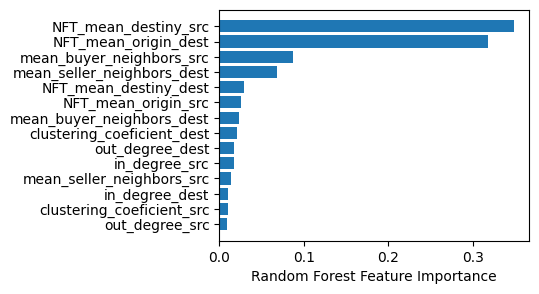

In [ ]:
plt.figure(figsize=(4, 3))
feature_names = np.array(['NFT_mean_origin_src',
       'NFT_mean_destiny_src', 'in_degree_src', 'out_degree_src',
       'mean_seller_neighbors_src', 'mean_buyer_neighbors_src',
       'clustering_coeficient_src', 'NFT_mean_origin_dest',
       'NFT_mean_destiny_dest', 'in_degree_dest', 'out_degree_dest',
       'mean_seller_neighbors_dest', 'mean_buyer_neighbors_dest',
       'clustering_coeficient_dest'])
feature_importances = model_forest.feature_importances_
sorted_idx = feature_importances.argsort()
plt.barh(feature_names[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()

In [ ]:
data_class.columns

Index(['NFT', 'mean_price_2021', 'mean_price_2020', 'last_owner',
       'origin_seller', 'Price_USD', 'NFT_mean_origin_src',
       'NFT_mean_destiny_src', 'in_degree_src', 'out_degree_src',
       'mean_seller_neighbors_src', 'mean_buyer_neighbors_src',
       'clustering_coeficient_src', 'NFT_mean_origin_dest',
       'NFT_mean_destiny_dest', 'in_degree_dest', 'out_degree_dest',
       'mean_seller_neighbors_dest', 'mean_buyer_neighbors_dest',
       'clustering_coeficient_dest', 'Quartil'],
      dtype='object')